In [97]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
import seaborn as sns
import sys
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

In [84]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
breast_cancer_wisconsin_original = fetch_ucirepo(id=15) 
  
# data (as pandas dataframes) 
X = breast_cancer_wisconsin_original.data.features 
Y = breast_cancer_wisconsin_original.data.targets 
  
# metadata 
print(breast_cancer_wisconsin_original.metadata) 
  
# variable information 
print(breast_cancer_wisconsin_original.variables) 

{'uci_id': 15, 'name': 'Breast Cancer Wisconsin (Original)', 'repository_url': 'https://archive.ics.uci.edu/dataset/15/breast+cancer+wisconsin+original', 'data_url': 'https://archive.ics.uci.edu/static/public/15/data.csv', 'abstract': 'Original Wisconsin Breast Cancer Database', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 699, 'num_features': 9, 'feature_types': ['Integer'], 'demographics': [], 'target_col': ['Class'], 'index_col': ['Sample_code_number'], 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1990, 'last_updated': 'Sun Mar 10 2024', 'dataset_doi': '10.24432/C5HP4Z', 'creators': ['WIlliam Wolberg'], 'intro_paper': None, 'additional_info': {'summary': "Samples arrive periodically as Dr. Wolberg reports his clinical cases. The database therefore reflects this chronological grouping of the data. This grouping information appears immediately below, having been removed fro

In [85]:
print(len(X))
print(len(Y))

699
699


In [86]:
# Drop rows with missing values in 'Bare_nuclei' column and update X
X_cleaned = X.dropna(subset=['Bare_nuclei'])

# Filter 'Y' based on the indices of the cleaned X
Y_cleaned = Y.loc[X_cleaned.index]

# Reset indices for both X and Y to ensure alignment
X_cleaned.reset_index(drop=True, inplace=True)
Y_cleaned.reset_index(drop=True, inplace=True)

print(len(X_cleaned))
print(len(Y_cleaned))

683
683


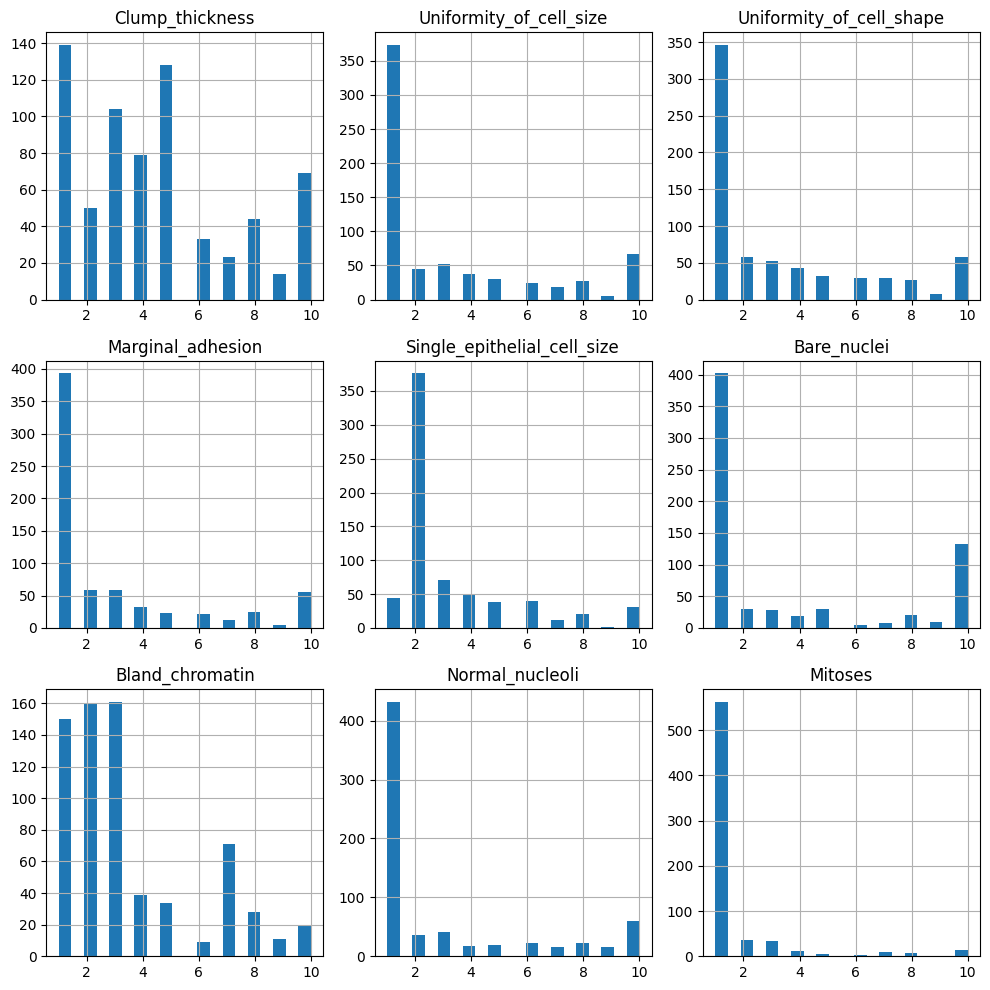

In [89]:
X_cleaned.hist(figsize=(10, 10), bins=20)
plt.tight_layout()
plt.show()

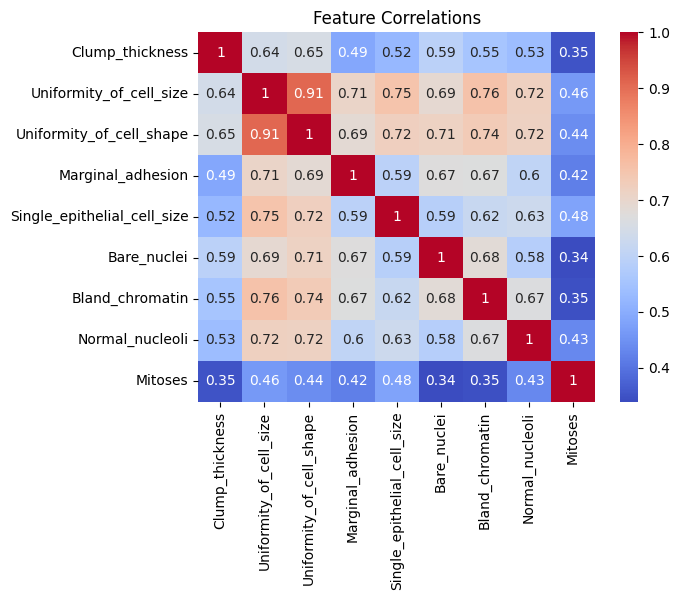

In [90]:
correlation_matrix = X_cleaned.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Feature Correlations")
plt.show()

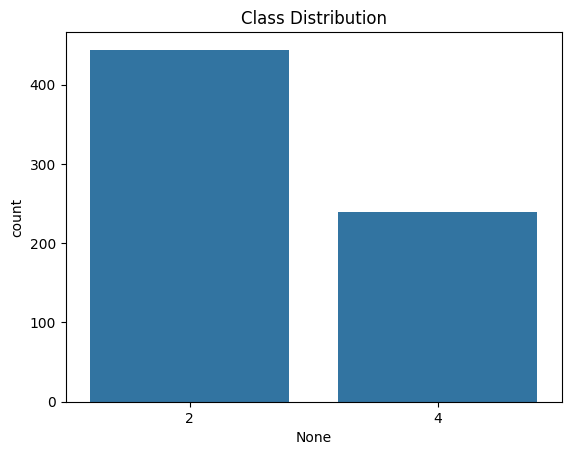

In [91]:
#Flattening Y for EDA
Y_flat = Y_cleaned.values.ravel()
Y_flat = pd.Series(Y_flat)

sns.countplot(x=Y_flat)
plt.title("Class Distribution")
plt.show()

In [94]:
# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_cleaned)

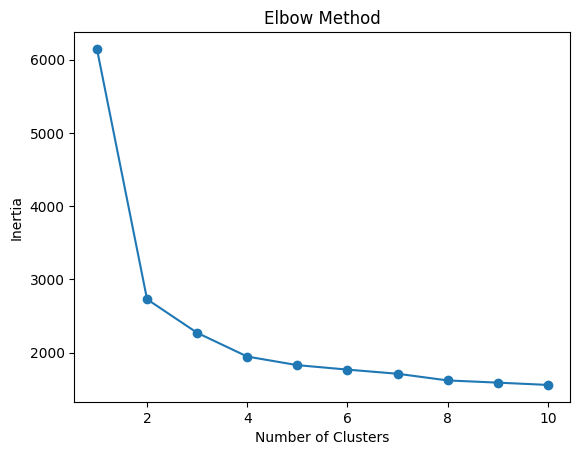

In [ ]:
# Elbow Method
inertia = []
k_values = range(1, 11)
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Curve
plt.plot(k_values, inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow')
plt.show()

In [96]:
# Fit K-means with chosen k
kmeans = KMeans(n_clusters=2, random_state=10)
kmeans.fit(X_scaled)

cluster_labels = kmeans.labels_
print(cluster_labels)

[0 1 0 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0
 1 1 1 1 1 1 0 1 0 0 1 1 0 1 1 1 1 1 0 0 0 1 0 1 0 0 1 0 1 1 0 0 1 0 1 1 0
 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 1 1 1 1 0 1 0 1 1
 1 0 0 0 1 0 0 0 0 1 1 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1
 1 0 0 1 0 0 1 1 0 0 0 0 1 1 0 0 0 0 0 1 1 1 0 1 0 0 0 0 0 1 1 0 1 1 1 0 1
 1 0 0 0 0 1 0 0 0 1 1 0 0 0 1 1 0 0 0 1 1 0 1 1 1 0 0 1 0 0 1 0 1 1 0 1 1
 0 1 1 1 0 1 0 1 1 1 1 0 0 0 0 0 0 1 0 0 0 1 1 1 1 1 0 0 0 1 1 1 1 1 1 0 1
 1 1 0 1 0 1 0 0 0 0 0 1 0 0 1 1 1 1 1 0 1 1 0 0 1 1 1 0 1 1 0 1 0 1 1 0 0
 1 0 0 0 1 0 0 1 1 0 1 1 0 1 0 0 0 0 1 1 1 0 0 1 1 0 1 0 0 1 1 0 0 0 1 0 0
 0 0 1 0 0 1 1 0 0 0 1 1 1 1 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 1
 0 0 0 1 0 1 0 0 0 0 0 0 1 1 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1 1 0
 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 1 1 0 0 1 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 

In [82]:
# Data split IF needed. Right now it is inactive code.

# Step 1: Split into training (60%) and temp (40%) datasets
#X_train, X_temp, Y_train, Y_temp = train_test_split(X_cleaned, Y_cleaned, test_size=0.4, random_state=42)

# Step 2: Split the temp dataset into validation (20%) and test (20%) datasets
#X_val, X_test, Y_val, Y_test = train_test_split(X_temp, Y_temp, test_size=0.5, random_state=42)

# Verify the sizes of each dataset
#print("Training set size:", len(X_train))
#print("Validation set size:", len(X_val))
#print("Test set size:", len(X_test))

In [98]:
# Calculate Silhouette Score
sil_score = silhouette_score(X_scaled, cluster_labels)
print(f'Silhouette Score: {sil_score}')

Silhouette Score: 0.5732450609290859
